# DIABETES PREDICTION ANALYSIS 

#### IMPORTING LIBRARIES

In [253]:
#The import numpy portion of the code tells Python to bring the NumPy library into your current environment.
#The as np portion of the code then tells Python to give NumPy the alias of np. This allows us to use NumPy functions by simply typing np.function_name rather than numpy.function_name.
import numpy as np
#pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,built on top of the Python programming language
import pandas as pd
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
#Set aspects of the visual theme for all matplotlib and seaborn plots
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
#Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
#svm are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis
from sklearn import svm
#In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true
from sklearn.metrics import accuracy_score

#### COLLECTING DIABETES DATA AND ANALYSING

#### PIMA DIABETES DATASET

In [236]:
diabetes_dataset = pd.read_csv('diabetes.csv')
#loading daibetes dataset to pandas dataframe
#read_csv - Reads a comma-separated values (csv) file into DataFrame.

In [237]:
#Printing first 5 rows of dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [238]:
#Total number of rows and columns in this dataset
diabetes_dataset.shape
#There are total 768 rows and 9 columns in this dataset(It means the data is taken from 768 person)

(768, 9)

### DESCRIPTION

In [239]:
#Statistical Measures of data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [240]:
#To check count of how many are diabetic and how many are non diabetic in dataset
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 - Non-Diabetic

1 - Diabetic

In [241]:
#To get mean for labelled dataset 0 and 1
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [242]:
#Seperating the Outcome label from dataset
X = diabetes_dataset.drop(columns = 'Outcome',axis = 1)
Y = diabetes_dataset['Outcome']

In [243]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [244]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### FINDING NULL VALUES

In [245]:
X.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [246]:
#Finding corelation which tells how one value is related to other
X.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [247]:
#Finding Mean of dataset with respect to Age
X.groupby('Age').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
Age,,,,,,,
21,1.079365,108.317460,65.936508,19.349206,73.634921,27.817460,0.433825
22,1.555556,108.208333,63.722222,20.486111,74.486111,29.509722,0.430625
23,1.578947,111.578947,64.315789,22.368421,118.026316,31.502632,0.438579
24,1.891304,117.891304,64.956522,25.934783,88.021739,32.569565,0.393565
25,1.770833,110.083333,59.666667,23.958333,82.895833,31.943750,0.600500
26,1.969697,118.212121,64.181818,23.666667,90.878788,34.915152,0.413455
27,2.562500,115.281250,73.500000,18.375000,63.125000,31.950000,0.471750
28,3.028571,119.914286,68.314286,23.628571,94.600000,33.642857,0.459629
29,3.310345,127.379310,68.241379,21.000000,88.793103,33.541379,0.408897


## DATA ANALYSIS

## PLOT

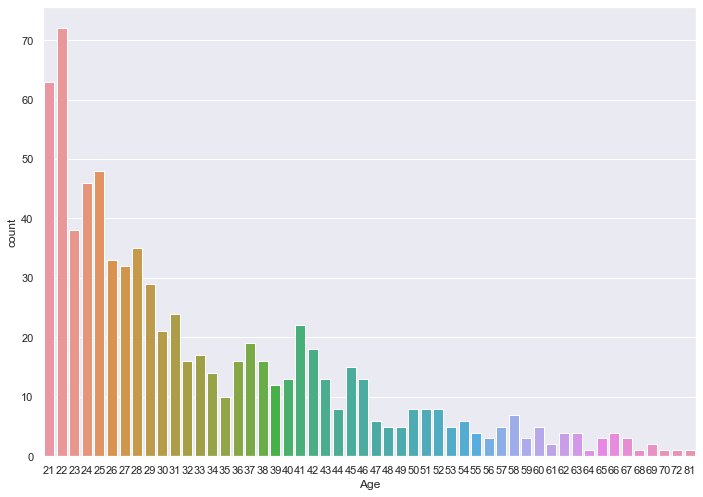

In [248]:
#Show the counts of observations in each categorical bin using bars
sns.countplot(x = X['Age'])
plt.show();

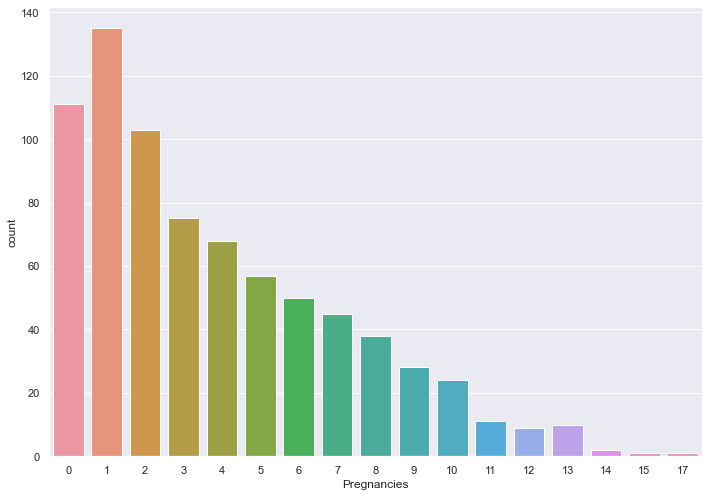

In [249]:
sns.countplot(x = X['Pregnancies'])
plt.show()

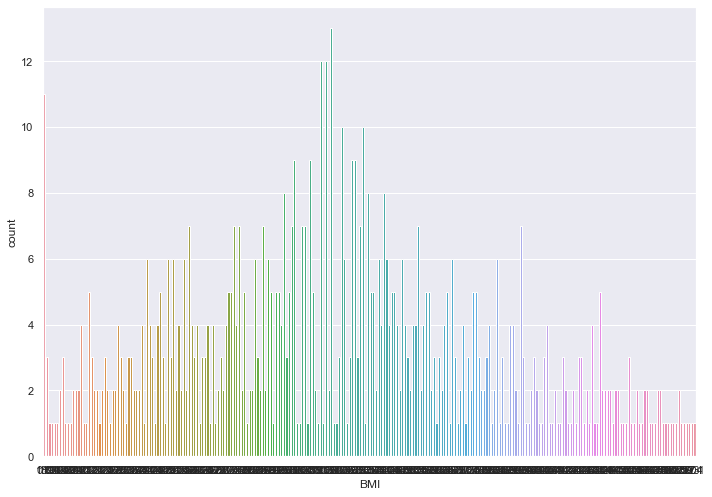

In [250]:
sns.countplot(x = X['BMI'])
plt.show()

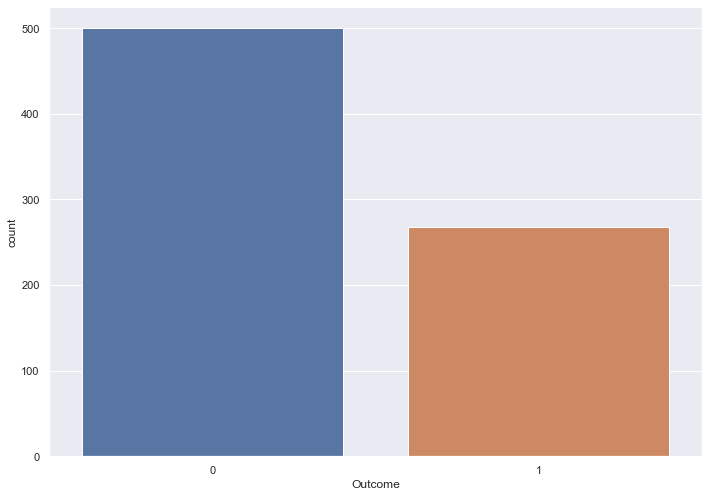

In [251]:
sns.countplot(x = diabetes_dataset['Outcome'])
plt.show()

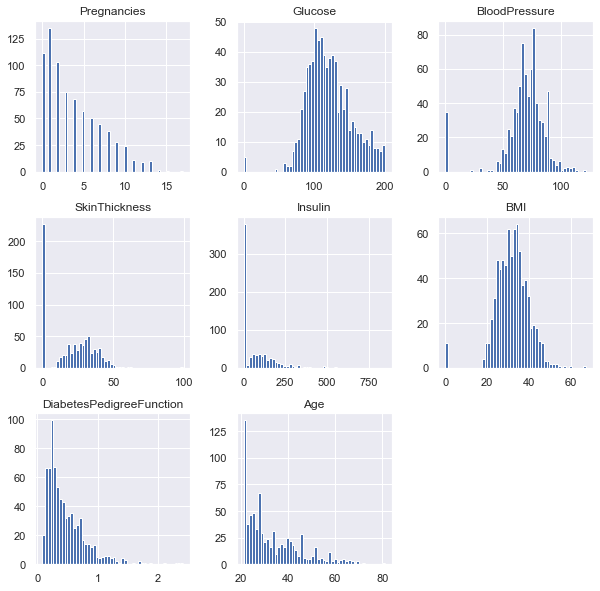

In [252]:
X.hist(figsize=(10,10),bins=50)
plt.show()

## DATA STRANDRIZATION

In [217]:
#Standardize features by removing the mean and scaling to unit variance
scaler_data = StandardScaler()

In [218]:
scaler_data.fit(X)

StandardScaler()

In [219]:
standerized_data = scaler_data.transform(X)

In [220]:
X = standerized_data
Y = diabetes_dataset['Outcome']

In [221]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [222]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## SPLITTING DATA

In [223]:
#Split arrays or matrices into random train and test subsets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state = 2)

In [224]:
X.shape

(768, 8)

In [225]:
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


## TRAINING MODEL

In [226]:
#To load SVM
#Specifies the kernel type to be used in the algorithm
classifier = svm.SVC(kernel='linear')

In [227]:
#Training Support Vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

## MODEL EVALUATION

### ACCURACY SCORE

In [228]:
#Accuracy Score on Training Data
X_train_prediction = classifier.predict(X_train)
training_accuracy_train_data = accuracy_score(X_train_prediction, Y_train)

In [229]:
print("Accuracy Score:",training_accuracy_train_data)

Accuracy Score: 0.7719869706840391


In [230]:
#Accuracy Score on Testing Data
X_test_prediction = classifier.predict(X_test)
training_accuracy_test_data = accuracy_score(X_test_prediction, Y_test)

In [231]:
print("Accuracy Score:",training_accuracy_test_data)

Accuracy Score: 0.7662337662337663


## PREDICTING SYSTEM

In [232]:
input_data = (2,95,54,14,88,26.1,0.748,22)
#Converting List into Numpy Array
numpy_data = np.asarray(input_data)
#Reshaping the array as we have 768 examples but we are trying to predict for 1 example
numpy_data_reshape = numpy_data.reshape(1,-1)
#We have to starnderize the input data to get correct prediction
stranderized_input_data = scaler_data.transform(numpy_data_reshape)
#Now we will make prediction
data_prediction = classifier.predict(stranderized_input_data)

In [233]:
print(stranderized_input_data)
print(data_prediction)

[[-0.54791859 -0.81042491 -0.78091875 -0.41001936  0.07120427 -0.74788157
   0.83392634 -0.95646168]]
[0]


In [234]:
#if-else condition to print output
if(data_prediction[0] == 0):
    print("Person is Non-Diabetic")
else:
    print("Person is Diabetic")


Person is Non-Diabetic
